# High Frequency Words
## DATA620
### Santosh Manjrekar, Dhananjay Kumar, Sang Yoon (Andy) Hwang, Matheesha T

In [1]:
import nltk, re, pprint
from nltk import word_tokenize
from nltk.corpus import stopwords
from urllib import request
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#nltk.download() # Use d and punkt to install

## Introduction
For this study of high frequency words using *NLTK* we have elected to download *The Adventure of Sherlock Holmes* by Arthur Conan Doyle. This text is available from Project Gutenberg and we access the file using the link in the code below. We did find that the text contains in interesting distribution of words that does not necessarily follow Zipf's Law.

In [2]:
# Loading in The Adventures of Sherlock Holmes by Arthur Conan Doyle
url = "http://www.gutenberg.org/cache/epub/1661/pg1661.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')

In [3]:
raw[1:80]

"Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle\r\n\r"

## Limiting to Just the Text
Project Gutenberg texts contain extra data in the header and footer of the text. We need to limit the corpus to just the text of the book and do so with the code below. This must be done by hand since each book has a slightly different header and footer text.

In [4]:
text_start = raw.find("ADVENTURE I")
text_end = raw.find("End of the Project Gutenberg EBook of The Adventures of Sherlock Holmes")
raw = raw[text_start:text_end]

In [5]:
raw[0:80]

'ADVENTURE I. A SCANDAL IN BOHEMIA\r\n\r\nI.\r\n\r\nTo Sherlock Holmes she is always THE '

In [6]:
tokens = word_tokenize(raw)
words = [w for w in tokens if w.isalpha()]
words = [w.lower() for w in words]

In [7]:
len(tokens)

125587

## Total Unique Words
We have elected to count the total number of unique words in three different ways. The first is just count the number of unique words in all of their variants. Secondly we used the Porter Stemmer to reduce all words to their stems. This will compress a number of words to the same value. Finally we used the WordNet Lemmatizer to reduce the words in the text to their root lemma. This also compressed the text to a smaller set.

### Using all Variations of a Word
We find that using all variations of a word gives us 7607 unique words in the text.

In [8]:
len(set(words))

7607

### Using the Porter Stemmer
Reducing each of the words to its stem gives us a set of words that total 5389 unique words.

In [9]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [10]:
stem = [ps.stem(w) for w in words]
stem = set(stem)
len(stem)

5389

### Using the WordNet Lemmatizer
Finnaly reducing each of the words to its underlying lemma produces a unique word list of 6930 words.

In [11]:
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()

In [12]:
lemma = [wordnet.lemmatize(w) for w in words]
lemma = set(lemma)
len(lemma)

6930

## Half the Unique Words
For this problem we interpreted the problem to try an find out howmany different words are used to cover half of the total words in the text. This gives us an idea of how much vocabulary is used to fill half of the text. We found that 118 unique words make up a liitle more than 50% of the words in the text. Expect to read a lot of "the", "and", and "I" in this novel.

In [13]:
fd = nltk.FreqDist(words)
top_words = fd.most_common(200)

In [14]:
i = 0
half_words = []
for w in top_words:
    if i >= len(tokens)/2:
        break
    else:
        i = i + w[1]
        half_words.append(w)

len(half_words)

118

In [15]:
half_wordsdf = pd.DataFrame(half_words, columns = ['Words','Count'])
half_wordsdf.head(10)

,Words,Count
0,the,5595
1,and,2991
2,i,2989
3,to,2681
4,of,2646
5,a,2634
6,in,1760
7,that,1742
8,it,1721
9,he,1482


## Top 200 Words
We next use the built in frequency distribution function in *NLTK* to count the frequency of each word in the text. We then built a plot of these 200 words. We also decided to remove the most common start words and plot a graph of these words as well. We see from this second graph that Holmes occurs more than 450 times in the text.

In [16]:
top_words = fd.most_common(200)
top_wordsdf = pd.DataFrame(top_words, columns = ['Word', 'Count'])
top_wordsdf.head(5)

,Word,Count
0,the,5595
1,and,2991
2,i,2989
3,to,2681
4,of,2646


In [17]:
top_wordsdf.tail(5)

,Word,Count
195,something,65
196,doubt,64
197,remarked,64
198,rather,64
199,though,63


## Plot of the 200 Most Common Words

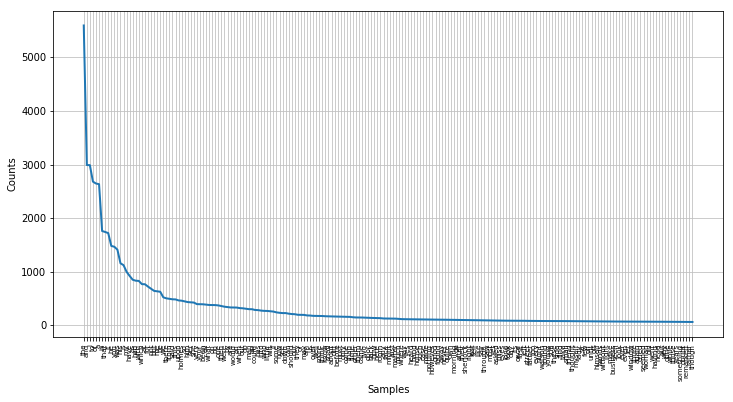

In [18]:
plt.figure(figsize=(12, 6))
plt.rc('xtick', labelsize=7) 
# plot the top 20 tokens
fd.plot(200)

## Plot of the Top Words with Common Words Removed

In [19]:
stoplist = stopwords.words('english')
uwords = [w for w in words if w not in stoplist]
ufd = nltk.FreqDist(uwords)

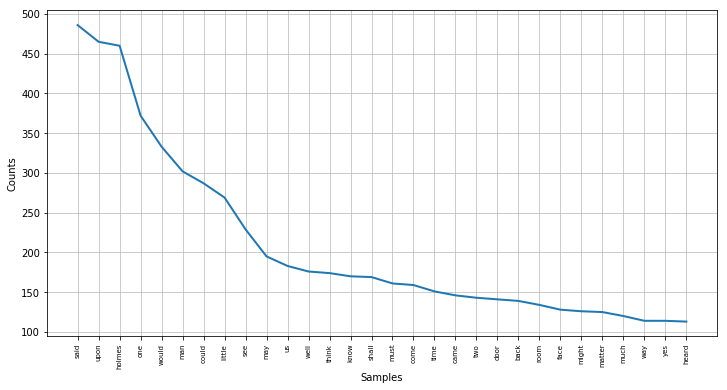

In [20]:
plt.figure(figsize=(12, 6))
ufd.plot(30)

## Testing Zipf's Law
Finally we test the performance of our text in accordance to Zipf's Law by plotting the frequency of the top 500 words on a log scale. We would expect that this forms a straight line but as we discuss below this was not the case.

In [21]:
zwords = top_words = fd.most_common(500)
x_vec = [i+1 for i in range(len(zwords))]
y_vec = [freq for (word,freq) in zwords]

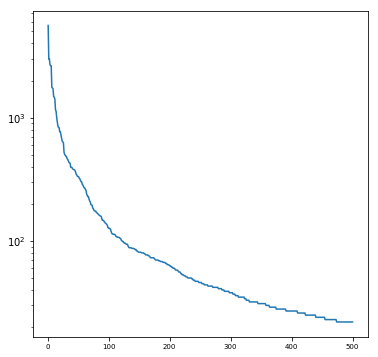

In [22]:
plt.figure(1, figsize=(6,6))
plt.semilogy(x_vec, y_vec)
plt.show()

According to Zipf's Law we expect if the most common word occurs n times then the next most common word should occur $\frac{n}{2}$ times and so on. On a log scale graph this would be a straight line. We can see from our text, *The Adventures of Sherlock Holmes* that this is not the case. It appears that the most commonly used words occur at a much higher frequency then the next and so on for the first 100 words or so. This gives us the curved graph that we see above.

Compared to all texts I think that this corpus uses the same “common” words as we would find across all corpus in the English language. However given our graph from testing Zipf’s Law we see that Arthur Conan Doyle uses the word “the” more often then we would expect and then uses the rest of his common vocabulary in a similar amounts. We would expect to see a reduction more similar to a straight line on the log scale. 